# This is a the All Sky Simulation for YSO Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

# Star Selection Rules
The star selection rules are laid out in detail on this webpage: https://wiki.sdss.org/display/MWM/YSO+selection+function

In [2]:
yso_tab = Table.read('workspace/target_files/YSO/ysotargeting.fits')
yso_tab

designation,ra,dec,Hmag,eHmag,S1,S2,S2_5,S3,CMZ,CLUST
,deg,deg,mag,mag,,,,,,
bytes21,float64,float64,float64,float64,int16,int16,int16,int16,int16,int16
Gaia DR2 100041326753,105.72118738783394,56.70840747148655,11.317000389099121,0.02500000037252903,0,0,0,1,0,0
Gaia DR2 100307490601,105.7771330797619,61.00130561495751,9.555000305175781,0.020999999716877937,0,0,0,1,0,0
Gaia DR2 100354625720,99.48472200134853,60.2531713940591,12.932999610900879,0.023000000044703484,0,0,0,1,0,0
Gaia DR2 100399392593,102.6889286291412,62.220093141849134,10.96399974822998,0.020999999716877937,0,0,0,1,0,0
Gaia DR2 100403515762,101.36594741768937,61.571063751843376,12.645999908447266,0.020999999716877937,0,0,0,1,0,0
Gaia DR2 100410714556,100.34895049744945,61.981119536331754,12.25100040435791,0.020999999716877937,0,0,0,1,0,0
Gaia DR2 100443974783,96.62966390424319,58.72669649112552,7.710000038146973,0.023000000044703484,0,0,0,0,0,1
Gaia DR2 100474114716,96.17957395857971,59.37523176888847,12.930999755859375,0.032999999821186066,0,0,0,1,0,0


## Plot Hmag distribution of targets

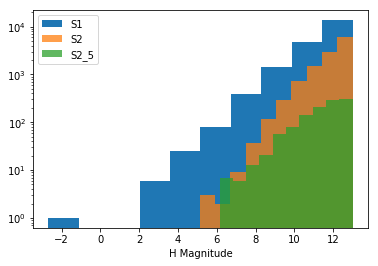

In [3]:
plt.hist(yso_tab['Hmag'][(yso_tab['S1'] == True)],label='S1')
plt.hist(yso_tab['Hmag'][(yso_tab['S2'] == True)],label='S2',alpha=0.75)
plt.hist(yso_tab['Hmag'][(yso_tab['S2_5'] == True)],label='S2_5',alpha=0.75)
plt.yscale('log')
plt.xlabel('H Magnitude')
plt.legend()
plt.show()

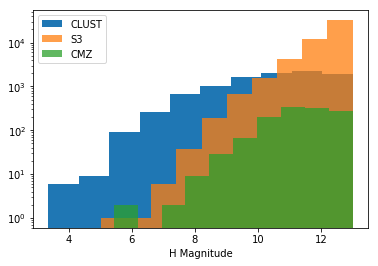

In [4]:
plt.hist(yso_tab['Hmag'][(yso_tab['CLUST'] == True)],label='CLUST')
plt.hist(yso_tab['Hmag'][(yso_tab['S3'] == True)],label='S3',alpha=0.75)
plt.hist(yso_tab['Hmag'][(yso_tab['CMZ'] == True)],label='CMZ',alpha=0.75)
plt.yscale('log')
plt.xlabel('H Magnitude')
plt.legend()
plt.show()

## Plot All Targets

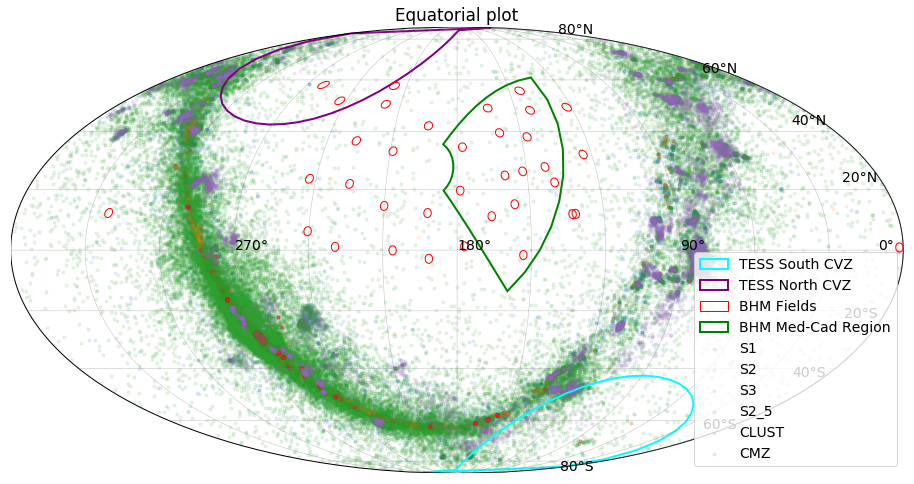

In [5]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot YSO Targets
s1x,s1y = bmap(yso_tab['ra'][(yso_tab['S1'] == True)],yso_tab['dec'][(yso_tab['S1'] == True)])
bmap.scatter(s1x,s1y,marker='.',label='S1',alpha=0.1)
s2x,s2y = bmap(yso_tab['ra'][(yso_tab['S2'] == True)],yso_tab['dec'][(yso_tab['S2'] == True)])
bmap.scatter(s2x,s2y,marker='.',label='S2',alpha=0.1)
s3x,s3y = bmap(yso_tab['ra'][(yso_tab['S3'] == True)],yso_tab['dec'][(yso_tab['S3'] == True)])
bmap.scatter(s3x,s3y,marker='.',label='S3',alpha=0.1)
s2_5x,s2_5y = bmap(yso_tab['ra'][(yso_tab['S2_5'] == True)],yso_tab['dec'][(yso_tab['S2_5'] == True)])
bmap.scatter(s2_5x,s2_5y,marker='.',label='S2_5',alpha=0.1)
clustx,clusty = bmap(yso_tab['ra'][(yso_tab['CLUST'] == True)],yso_tab['dec'][(yso_tab['CLUST'] == True)])
bmap.scatter(clustx,clusty,marker='.',label='CLUST',alpha=0.1)
cmzx,cmzy = bmap(yso_tab['ra'][(yso_tab['CMZ'] == True)],yso_tab['dec'][(yso_tab['CMZ'] == True)])
bmap.scatter(cmzx,cmzy,marker='.',label='CMZ',alpha=0.1)
plt.title("Equatorial plot")
plt.legend(loc=4)
plt.show()

## Create Target Table

In [6]:
target_tab = Table()

## Determine Cadence type
Stars with H mag < 11.5 get 3 visits and dimmer stars get 6 visits

In [7]:
cadence_arr = np.repeat('mwm_yso_6x1',len(yso_tab))
cadence_arr[(yso_tab['Hmag'] < 11.5)] = 'mwm_yso_3x1'

In [8]:
target_tab['ra'] = yso_tab['ra']
target_tab['dec'] = yso_tab['dec']
target_tab['cadence'] = cadence_arr
target_tab

ra,dec,cadence
deg,deg,
float64,float64,str11
105.72118738783394,56.70840747148655,mwm_yso_3x1
105.7771330797619,61.00130561495751,mwm_yso_3x1
99.48472200134853,60.2531713940591,mwm_yso_6x1
102.6889286291412,62.220093141849134,mwm_yso_3x1
101.36594741768937,61.571063751843376,mwm_yso_6x1
100.34895049744945,61.981119536331754,mwm_yso_6x1
96.62966390424319,58.72669649112552,mwm_yso_3x1
96.17957395857971,59.37523176888847,mwm_yso_6x1


## Set type

In [9]:
type_arr = np.repeat('YSO_CLUST',len(yso_tab))
type_arr[(yso_tab['S1'] == True)] = 'YSO_S1'
type_arr[(yso_tab['S2'] == True)] = 'YSO_S2'
type_arr[(yso_tab['S2_5'] == True)] = 'YSO_S2_5'
type_arr[(yso_tab['S3'] == True)] = 'YSO_S3'
type_arr[(yso_tab['CMZ'] == True)] = 'YSO_CMZ'
target_tab['type'] = type_arr
target_tab

ra,dec,cadence,type
deg,deg,,
float64,float64,str11,str9
105.72118738783394,56.70840747148655,mwm_yso_3x1,YSO_S3
105.7771330797619,61.00130561495751,mwm_yso_3x1,YSO_S3
99.48472200134853,60.2531713940591,mwm_yso_6x1,YSO_S3
102.6889286291412,62.220093141849134,mwm_yso_3x1,YSO_S3
101.36594741768937,61.571063751843376,mwm_yso_6x1,YSO_S3
100.34895049744945,61.981119536331754,mwm_yso_6x1,YSO_S3
96.62966390424319,58.72669649112552,mwm_yso_3x1,YSO_CLUST
96.17957395857971,59.37523176888847,mwm_yso_6x1,YSO_S3


## Set priority
For now, no priority differences among targets. Setting to default of 40

In [10]:
target_tab['priority'] = np.repeat(np.array(40,dtype='int32'),len(yso_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(yso_tab))

In [11]:
target_tab

ra,dec,cadence,type,priority,value
deg,deg,,,,
float64,float64,str11,str9,int32,float32
105.72118738783394,56.70840747148655,mwm_yso_3x1,YSO_S3,40,1.0
105.7771330797619,61.00130561495751,mwm_yso_3x1,YSO_S3,40,1.0
99.48472200134853,60.2531713940591,mwm_yso_6x1,YSO_S3,40,1.0
102.6889286291412,62.220093141849134,mwm_yso_3x1,YSO_S3,40,1.0
101.36594741768937,61.571063751843376,mwm_yso_6x1,YSO_S3,40,1.0
100.34895049744945,61.981119536331754,mwm_yso_6x1,YSO_S3,40,1.0
96.62966390424319,58.72669649112552,mwm_yso_3x1,YSO_CLUST,40,1.0
96.17957395857971,59.37523176888847,mwm_yso_6x1,YSO_S3,40,1.0


In [12]:
target_tab.write('mwm_yso_target.fits',overwrite=True)

## Create Cadence Table
Targets Hmag < 11.5 get 3 visits (delta time between visits ~day then ~month)
Targets Hmag 11.5 to 13 get 6 visits (delta time ~day then ~month, and then a minimum of every 2 days)

In [13]:
cadence_tab = Table()

In [14]:
cadence_tab['cadence'] = np.array(['mwm_yso_3x1', 'mwm_yso_6x1'])
cadence_tab['nepochs'] = np.array([3,6],dtype='int32')
delta = np.array([[0,1,30,np.nan,np.nan,np.nan]
                ,[0,1,30,2,2,2]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[ 0.  1. 30. nan nan nan]
 [ 0.  1. 30.  2.  2.  2.]]


In [15]:
cadence_tab

cadence,nepochs,delta [6]
str11,int32,float32
mwm_yso_3x1,3,0.0 .. nan
mwm_yso_6x1,6,0.0 .. 2.0


In [16]:
delta_min = np.array([[0,1,20,np.nan,np.nan,np.nan]
                ,[0,1,20,2,2,2]],dtype='float32')

print(delta_min)
cadence_tab['delta_min'] = delta_min

[[ 0.  1. 20. nan nan nan]
 [ 0.  1. 20.  2.  2.  2.]]


In [17]:
delta_max = np.array([[0,60,180,np.nan,np.nan,np.nan]
                ,[0,60,180,180,180,180]],dtype='float32')

print(delta_max)
cadence_tab['delta_max'] = delta_max

[[  0.  60. 180.  nan  nan  nan]
 [  0.  60. 180. 180. 180. 180.]]


In [18]:
lunation = np.array([[1,1,1,np.nan,np.nan,np.nan]
                ,[1,1,1,1,1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[ 1.  1.  1. nan nan nan]
 [ 1.  1.  1.  1.  1.  1.]]


In [19]:
instrument = np.array([['apogee','apogee','apogee',np.nan,np.nan,np.nan]
                ,['apogee','apogee','apogee','apogee','apogee','apogee']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee']]


In [20]:
cadence_tab

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
str11,int32,float32,float32,float32,float32,str6
mwm_yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_yso_6x1,6,0.0 .. 2.0,0.0 .. 2.0,0.0 .. 180.0,1.0 .. 1.0,apogee .. apogee


In [21]:
cadence_tab.write('mwm_yso_cadence.fits',overwrite=True)

In [22]:
test =  Table.read('mwm_yso_cadence.fits')
test

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
bytes11,int32,float32,float32,float32,float32,bytes24
mwm_yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_yso_6x1,6,0.0 .. 2.0,0.0 .. 2.0,0.0 .. 180.0,1.0 .. 1.0,apogee .. apogee
